In [2]:
import numpy as np
import pandas as np

import seaborn  as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [4]:
(X,y) = datasets.load_wine(return_X_y=True,as_frame=True)

In [5]:
print('Shape X: ', X.shape)

Shape X:  (178, 13)


In [6]:
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [7]:
y.shape

(178,)

In [8]:
y.groupby(y).count()

target
0    59
1    71
2    48
Name: target, dtype: int64

![alt text](img/prep_data_matrix.PNG)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree_instance=DecisionTreeClassifier(max_depth=10)

In [11]:
X.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0


In [19]:
y.sample(10)

110    1
65     1
0      0
23     0
176    2
108    1
107    1
39     0
103    1
114    1
Name: target, dtype: int32

---------------------

## Prep data for matrix featrures

-----------------------


In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

In [21]:
tree_instance.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=10)

In [22]:
tree_instance.tree_.node_count

9

<function matplotlib.pyplot.show(close=None, block=None)>

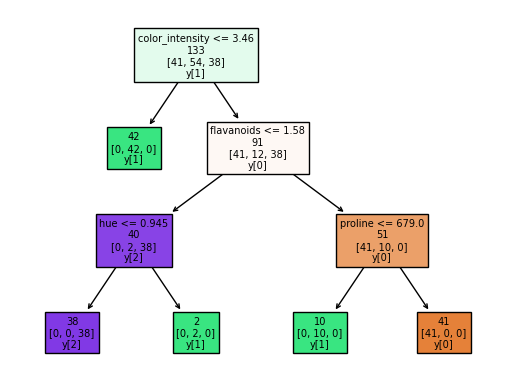

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(tree_instance,feature_names=Xtrain.columns,filled=True,class_names=True,label=2,impurity=False)
plt.show

In [27]:
ypred=tree_instance.predict(Xtest)

In [29]:
ypred

array([1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       0])

In [32]:
print(Xtest.iloc[0:10],[6,9])
print('Etiquetas ',ypred[0:10])

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
161    13.69        3.26  2.54               20.0      107.0           1.83   
117    12.42        1.61  2.19               22.5      108.0           2.00   
19     13.64        3.10  2.56               15.2      116.0           2.70   
69     12.21        1.19  1.75               16.8      151.0           1.85   
53     13.77        1.90  2.68               17.1      115.0           3.00   
138    13.49        3.59  2.19               19.5       88.0           1.62   
112    11.76        2.68  2.92               20.0      103.0           1.75   
14     14.38        1.87  2.38               12.0      102.0           3.30   
160    12.36        3.83  2.38               21.0       88.0           2.30   
107    12.72        1.75  2.28               22.5       84.0           1.38   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
161        0.56                  0.50            

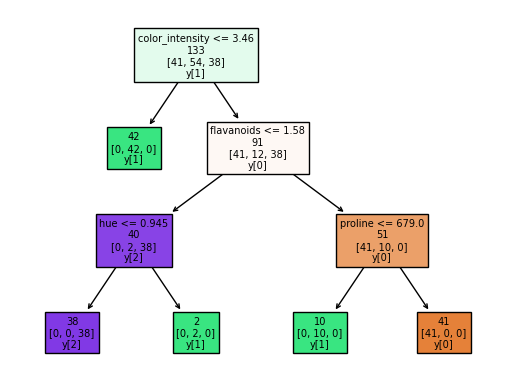

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(tree_instance, feature_names=Xtrain.columns,filled=True,class_names=True,label='none', impurity=False)
plt.show()

![alt text](img/seo_testing.PNG)

--------------------------------
## Hyperplane

Desicion Function 




$$ f(x) = w^tx + b $$







- x is the Vector
- w is the weight
- b es the bias

- Clasification executes evaluating $ f(x): $

if $f(x) \geq 0$,  the sample is classified in a class

if $f(x) < 0$, It´s classified in another class